# Projeto 7: Aglomeração Hierárquica

(150, 4)


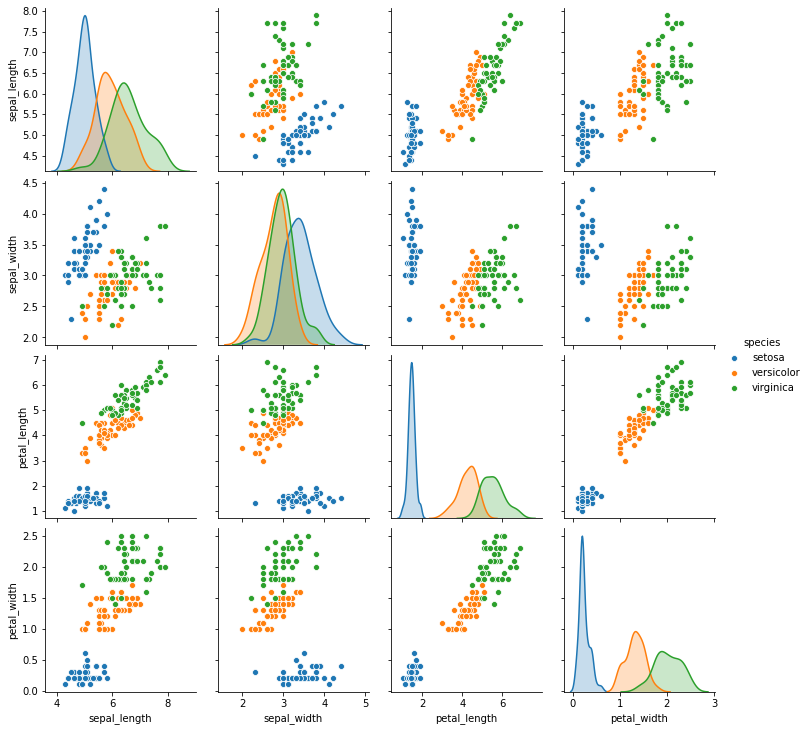

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

iris= pd.read_csv('../iris.cvs')
sns.pairplot(iris, hue = 'species') 
# print(iris_data)

#copy data with no labels
iris_data = iris.drop(['species'], axis=1, inplace = False)
# print(iris_data)

data = iris_data.values
print(data.shape)

### Parte A: Obter os dendrogramas para os dados Iris (usando as 4 medidas) através dos métodos aglomerativos hierárquicos:  single-linkage, complete-linkage, médias e Ward.

Single Linkage, single, 0
Average Linkage, average, 1
Complete Linkage, complete, 2
Ward Linkage, ward, 3


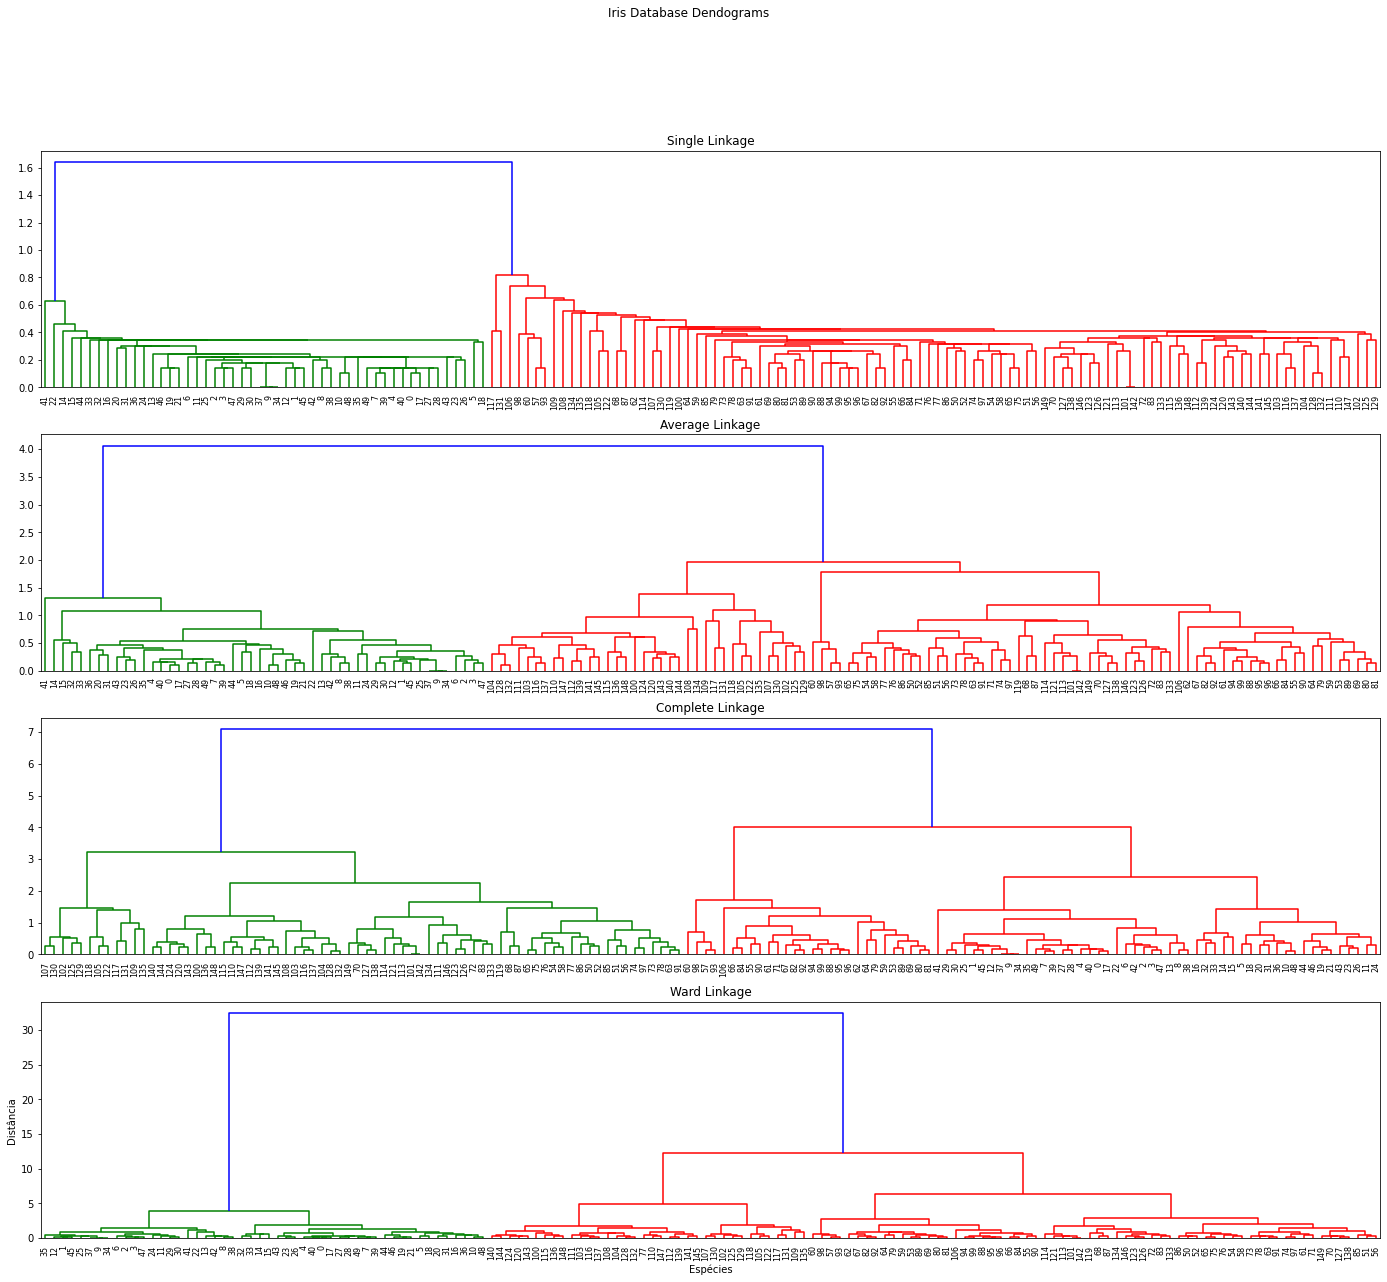

In [83]:
fig, ax = plt.subplots(4, 1, figsize=(24,2*10), sharex=False, squeeze=False)
ax = ax.flatten()
fig.suptitle("Iris Database Dendograms")

clustering_algorithms = (
    ('Single Linkage',   'single', 0),
    ('Average Linkage',  'average', 1),
    ('Complete Linkage', 'complete', 2),
    ('Ward Linkage',     'ward', 3),
)
for name, method, index in clustering_algorithms:
    print("%s, %s, %s" %(name, method, index))
    links = linkage(data, method)
    ax[index].set_title(name)
    dendrogram(links,truncate_mode='lastp',p=150,leaf_rotation=90.,leaf_font_size=8., ax = ax[index], orientation='top')

plt.xlabel('Espécies')
plt.ylabel('Distância')
plt.show()

## Parte B: Visualizar e discutir o interrelacionamento entre os dendrogramas.

Para vizualizar melhor vamos protar novamente os dados do dendograma mas agora com a classificação obtida por cada um dos métodos.

Single Linkage, single, 0
Average Linkage, average, 1
Complete Linkage, complete, 2
Ward Linkage, ward, 3


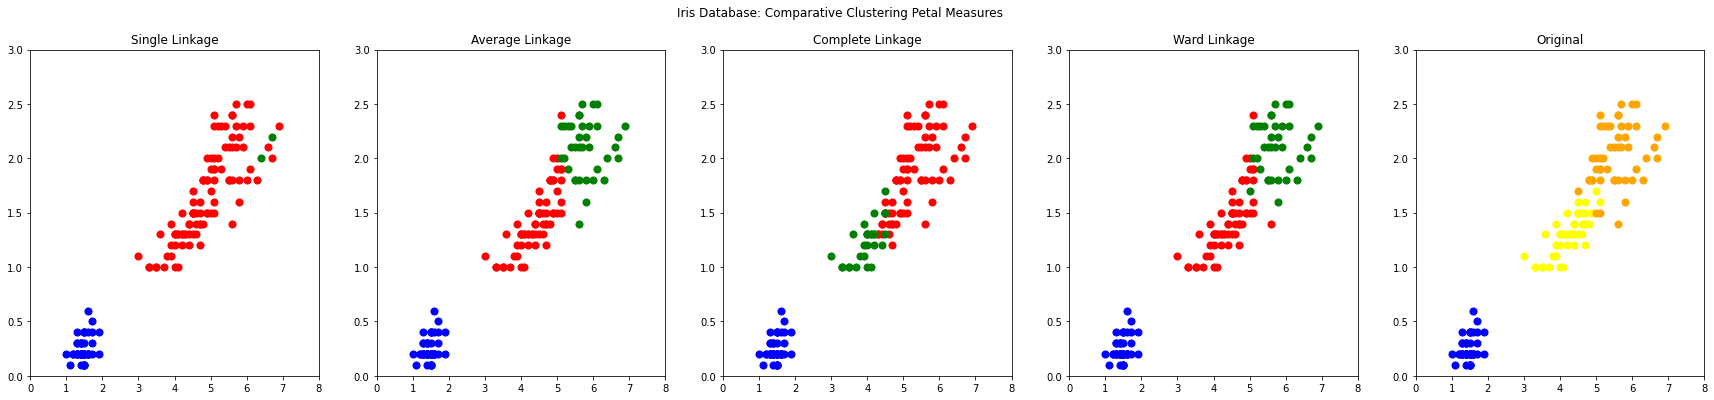

In [121]:
from sklearn.cluster import AgglomerativeClustering
X = data

fig, ax = plt.subplots(1, 5, figsize=(6*5,6), sharey = False)
# ax = ax.flatten()
fig.suptitle("Iris Database: Comparative Clustering Petal Measures")

clustering_algorithms = (
    ('Single Linkage',   'single', 0),
    ('Average Linkage',  'average', 1),
    ('Complete Linkage', 'complete', 2),
    ('Ward Linkage',     'ward', 3),
)
for name, method, index in clustering_algorithms:
    print("%s, %s, %s" %(name, method, index))
    # Separação em 3 clusters para as 3 especies de planta
    model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=method)
    model.fit(X)
    labels = model.labels_
    ax[index].scatter(X[labels==0, 2], X[labels==0, 3], s=50, marker='o', color='red')
    ax[index].scatter(X[labels==1, 2], X[labels==1, 3], s=50, marker='o', color='blue')
    ax[index].scatter(X[labels==2, 2], X[labels==2, 3], s=50, marker='o', color='green')
    ax[index].set_xlim(0,8)
    ax[index].set_ylim(0,3)
    ax[index].set_title(name)
    
#     links = linkage(data, method)
    
#     dendrogram(links,truncate_mode='lastp',p=150,leaf_rotation=90.,leaf_font_size=8., ax = ax[index], orientation='top')

# plt.xlabel('Espécies')
# plt.ylabel('Distância')

# Comparing to the original data
labels = iris['species']
ax[4].scatter(X[labels=='setosa', 2], X[labels=='setosa', 3], s=50, marker='o', color='blue')
ax[4].scatter(X[labels=='versicolor', 2], X[labels=='versicolor', 3], s=50, marker='o', color='yellow')
ax[4].scatter(X[labels=='virginica', 2], X[labels=='virginica', 3], s=50, marker='o', color='orange')
ax[4].set_title("Original")
ax[4].set_xlim(0,8)
ax[4].set_ylim(0,3)
plt.show()

## Parte C: Obter as matrizes de confusão para cada um dos 4 casos.  Pode ser montado manualmente a partir dos dendrogramas, considerando-se uns 30 pontos de cada categoria.  Também é possível cortar o dendrograms em 3 ramos e obter a matriz considerando-se todos os pontos, mas isso fica como opcional.